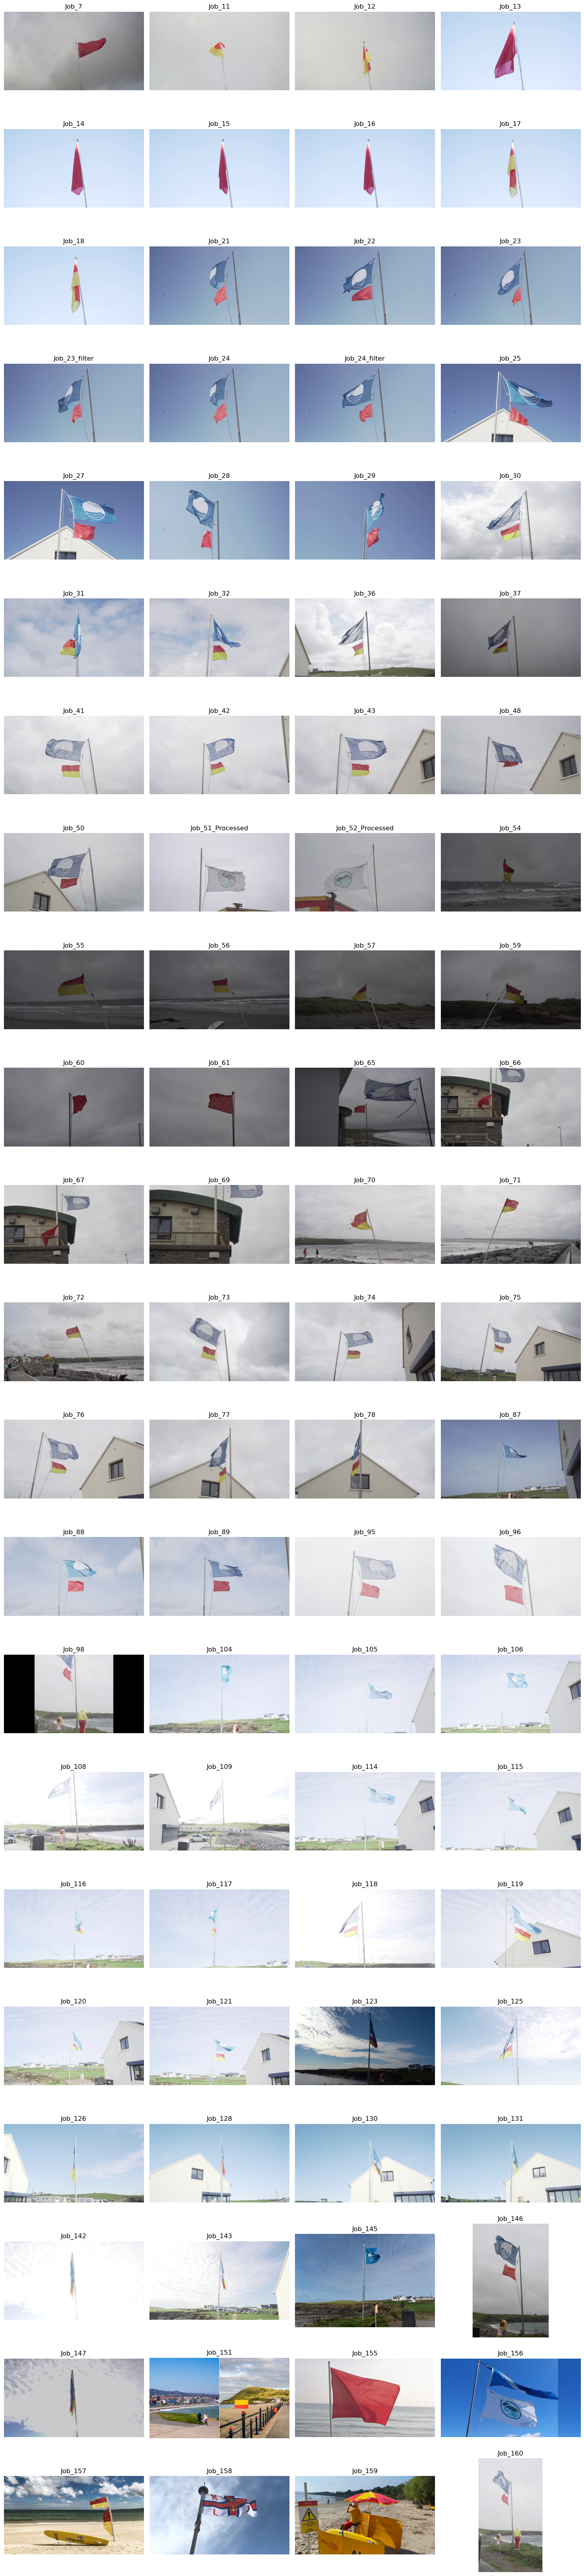

In [1]:
# Does Alphanumeric Sorting using a custom sorting key to ensures Job_7 comes before Job_104.
# Split folder name into text and numeric parts for correct sorting. (e.g., ["Job_", 7] for Job_7).
# Sort function for alphanumeric strings like 'Job_7', 'Job_104', or 'DSC08758.jpg'.import os

from PIL import Image
import matplotlib.pyplot as plt
import math
import re

def alphanumeric_sort_key(s):
    """
    Sort function for alphanumeric strings like 'Job_7', 'Job_104', or 'DSC08758.jpg'.
    """
    return [int(text) if text.isdigit() else text.lower() for text in re.split('([0-9]+)', s)]

def preview_images_in_grid(parent_folder, grid_width=6):
    """
    Display the first image from each subfolder in a grid view.
    """
    # Get subfolders sorted by alphanumeric order
    subfolders = sorted([f for f in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, f))],
                        key=alphanumeric_sort_key)

    # Collect the first image from each subfolder
    images = []
    for subfolder in subfolders:
        subfolder_path = os.path.join(parent_folder, subfolder)

        # Find the first image in the folder
        for filename in sorted(os.listdir(subfolder_path), key=alphanumeric_sort_key):
            if filename.lower().endswith((".png", ".jpg", ".jpeg")):
                image_path = os.path.join(subfolder_path, filename)
                images.append((subfolder, image_path))
                break  # Stop after finding the first image

    # Calculate the number of rows needed for the grid
    total_images = len(images)
    grid_height = math.ceil(total_images / grid_width)

    # Create the plot
    fig, axes = plt.subplots(grid_height, grid_width, figsize=(15, grid_height * 3))
    axes = axes.flatten()

    # Display each image in the grid
    for idx, (subfolder, image_path) in enumerate(images):
        try:
            img = Image.open(image_path)
            axes[idx].imshow(img)
            axes[idx].set_title(subfolder)
            axes[idx].axis("off")  # Hide axes for a cleaner view
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            axes[idx].axis("off")  # Skip the image but leave the grid cell blank

    # Hide any remaining empty grid cells
    for idx in range(len(images), len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()

# Parent folder path
parent_folder = r"D:\FlagDetectionDatasets\ExportedDatasetsReduced"
preview_images_in_grid(parent_folder, grid_width=4)
